In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm
from scipy.optimize import minimize_scalar
from functools import partial
n=100
x=np.random.normal(0,1,n)
t1=x.mean()
y=np.sort(x)
def d(t,z):
    f=norm.cdf(z[0], loc=t, scale=1)
    for i in range(1,n-1):
        f*=norm.cdf(z[i], loc=t, scale=1)-norm.cdf(z[i-1], loc=t, scale=1)
    f*=1-norm.cdf(z[n-1], loc=t, scale=1)
    return(-f)
g = partial(d, z=y)
t2=minimize_scalar(g)
print(t2.x,t1)

-0.023789877009630346 0.000360191686043283


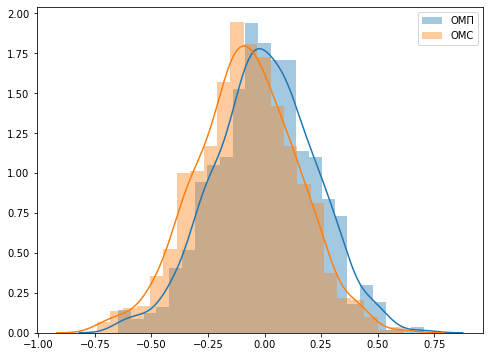

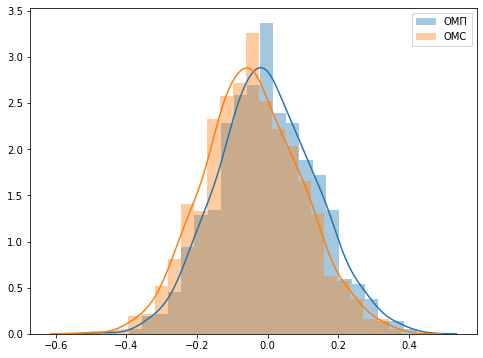

In [ ]:
m=[20,50,100]
for n in m:
    s=[]
    t=[]
    for i in range(0,1000):
        x=np.random.normal(0,1,n)
        s.append(x.mean())
        g = partial(d, z=x)
        t2=minimize_scalar(g)
        t.append(t2.x)
    plt.figure(figsize = (8,6))
    sb.distplot(s, label = 'ОМП') 
    sb.distplot(t, label = 'ОМС') 
    plt.legend()
    plt.show()


In [ ]:
m=[50]
for n in m:
    s=[]
    t=[]
    for i in range(0,1000):
        x=np.random.normal(0,1,n)
        s.append(np.sqrt(n)*x.mean())
        y=np.sort(x)
        g = partial(d, z=y)
        t2=minimize_scalar(g)
        t.append(np.sqrt(n)*t2.x)
    plt.figure(figsize = (8,6))
    sb.distplot(s, label = '$\alpha$') 
    sb.distplot(t, label = 'ОМС') 
    plt.title('')
    plt.legend()
    plt.show()

In [28]:
from scipy.optimize import minimize
n=100
x=np.random.normal(0,1,n)
t1=x.mean()
y=np.sort(x)
def d(t,z):
    f=norm.cdf(z[0], loc=t, scale=1)
    for i in range(1,n-1):
        f*=norm.cdf(z[i], loc=t, scale=1)-norm.cdf(z[i-1], loc=t, scale=1)
    f*=1-norm.cdf(z[n-1], loc=t, scale=1)
    return(-f)
g = partial(d, z=y)
t2=minimize(g,method = 'BFGS')
print(t2.x,t1)

TypeError: minimize() missing 1 required positional argument: 'x0'